# CENSUS INCOME DATA SET

This data set is taken from UCI Machine Learning Depository.
Source:https://archive.ics.uci.edu/ml/datasets/Census+Income
Our goal is to predict weather an individual earns more than 50k or not.
Lets start by importing essential packages.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
income_data = pd.read_csv( "census.csv")

In [5]:
income_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## Cleaning the data #

In [7]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
income_data=income_data.replace(to_replace="?",value=np.nan)

In [9]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  47985 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### Cleaning Workclass Column#

In [10]:
income_data['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
income_data['workclass'].isna().sum()

2799

In [12]:
income_data['workclass'].fillna('Private', inplace = True)

In [13]:
# We need to frst Categorize Occupation Column and then clean it

In [14]:
# Cleaning NativeCountry Column

In [15]:
income_data['native-country'].value_counts()

United-States                 43832
Mexico                          951
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Nicaragua                        49
Greece                           49
Peru                             46
Ecuador                     

In [16]:
income_data['native-country'].isna().sum()

857

In [17]:
income_data['native-country'].fillna('United-States', inplace = True)

In [18]:
# Transforming  Target Variable :
income_data['income_above_50K']=income_data['income'].map({'<=50K':0, '>50K':1})

## Exploratory Data Analysis #

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
def plotting(column):
    if income_data[column].dtype != 'int64':
        f, axes = plt.subplots(1,1,figsize=(15,5))
        sns.countplot(x=column, hue='income_above_50K', data = income_data)
        plt.xticks(rotation=90)
        plt.suptitle(column,fontsize=20)
        plt.show()
    else:
        g = sns.FacetGrid(income_data, row="income_above_50K", margin_titles=True, aspect=4, height=3)
        g.map(plt.hist,column,bins=100)
        plt.show()
    plt.show()

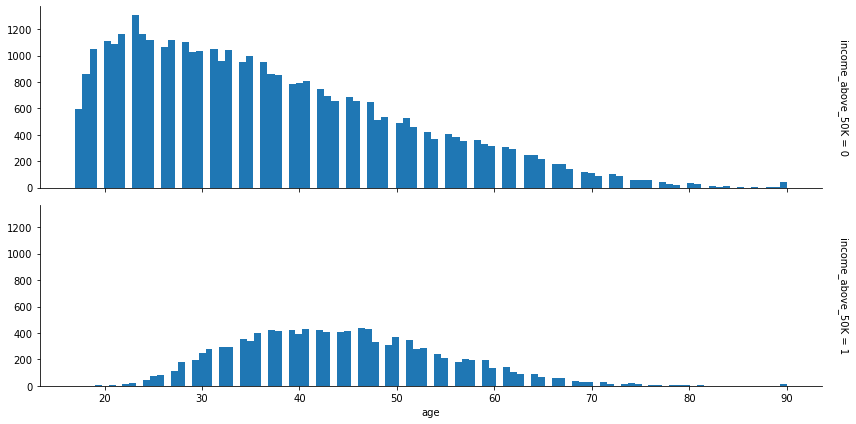

In [18]:
plotting('age')

In [19]:
# Right now we cannot interpret anything clearly but peoplw with income>50k are in middle age.

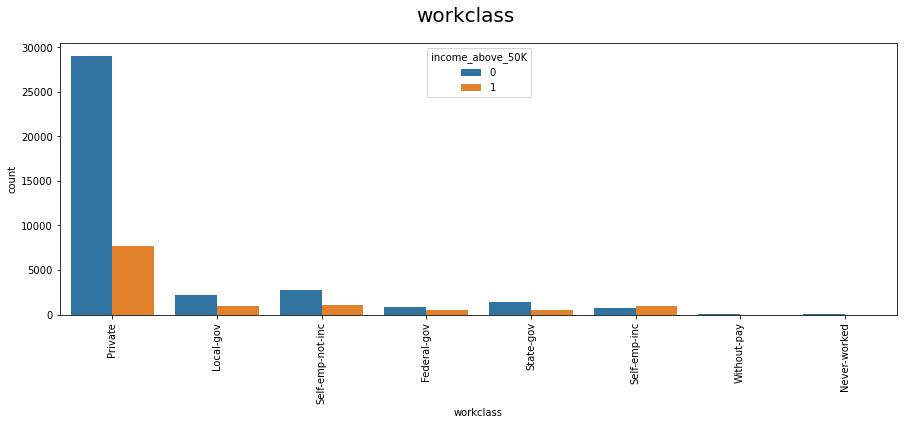

In [20]:
plotting('workclass')

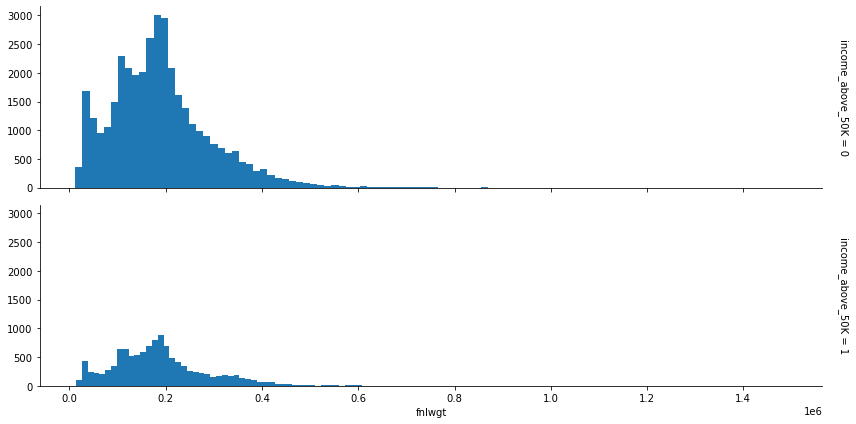

In [21]:
plotting('fnlwgt')

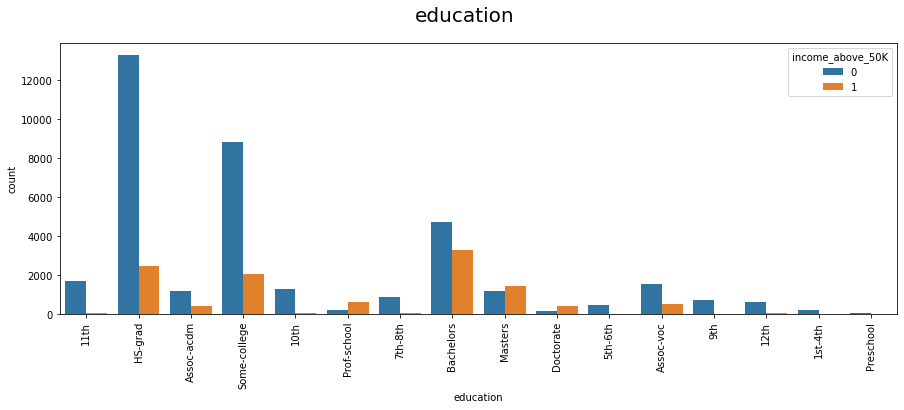

In [22]:
plotting('education')

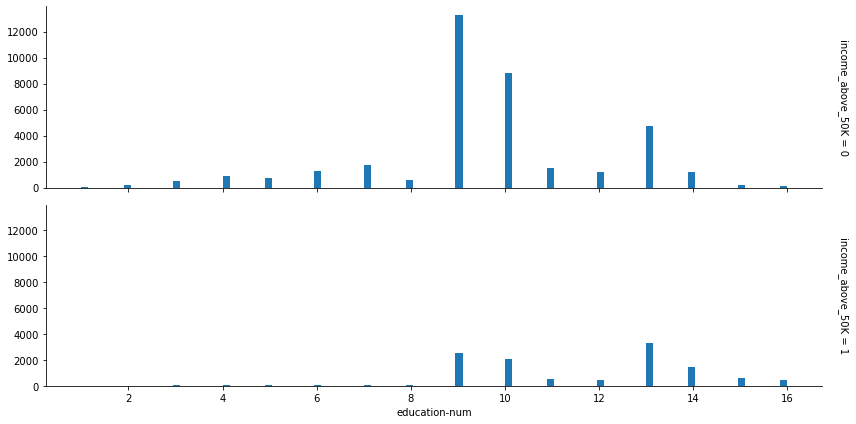

In [23]:
plotting('education-num')

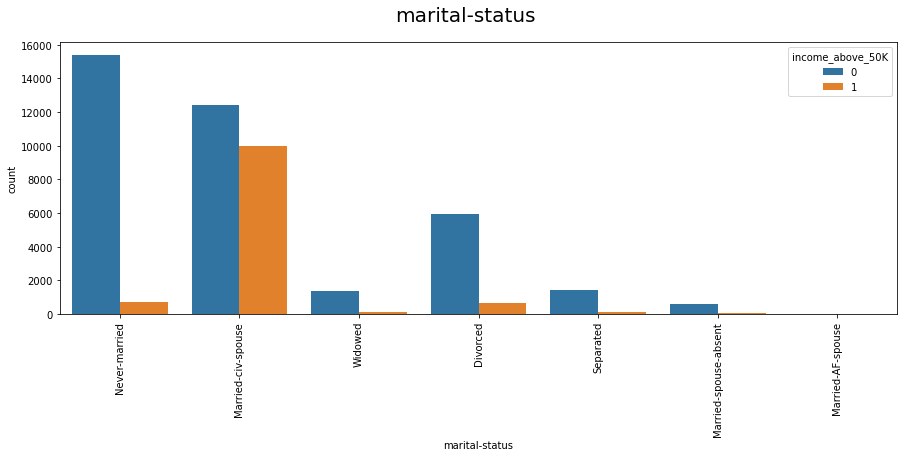

In [24]:
plotting('marital-status')

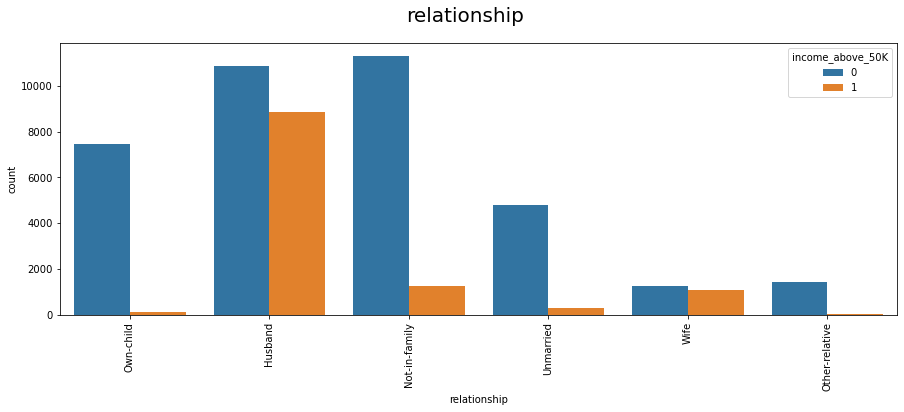

In [25]:
plotting('relationship')

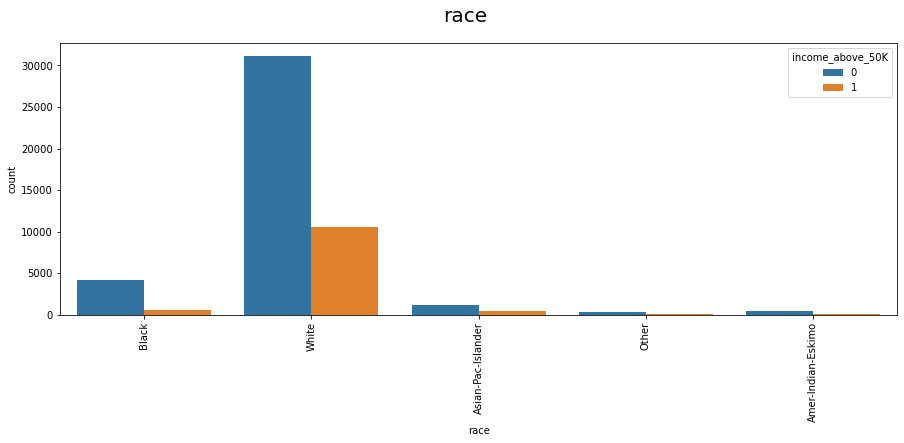

In [26]:
plotting('race')

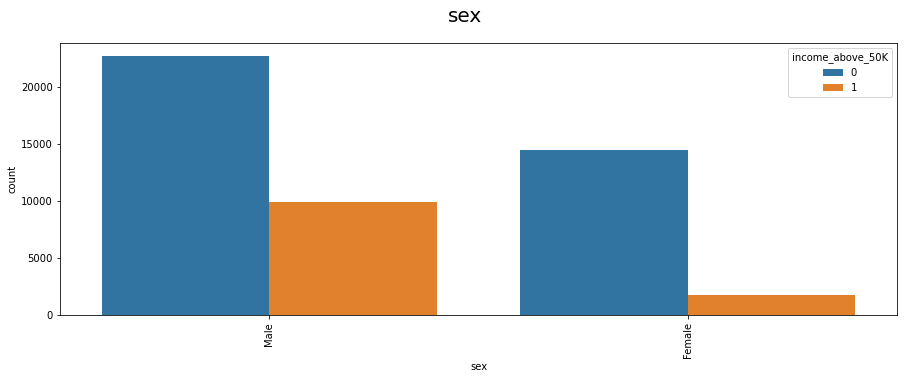

In [27]:
plotting('sex')

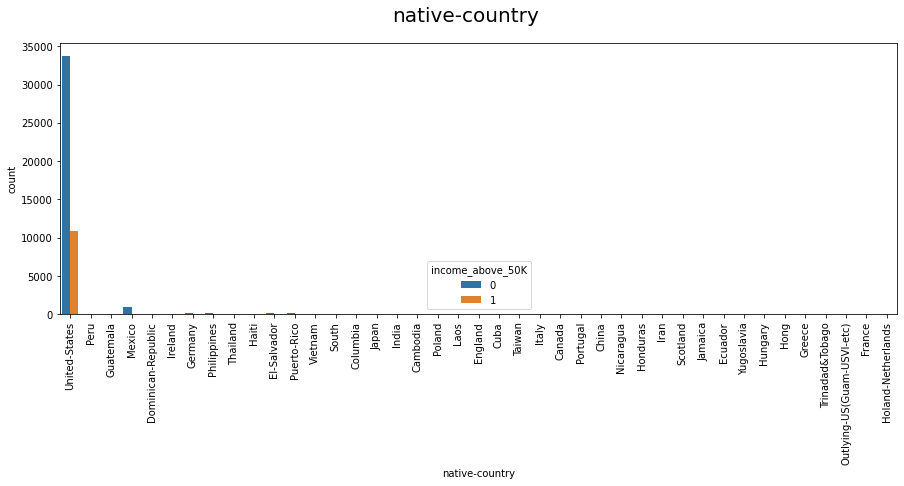

In [28]:
plotting('native-country')

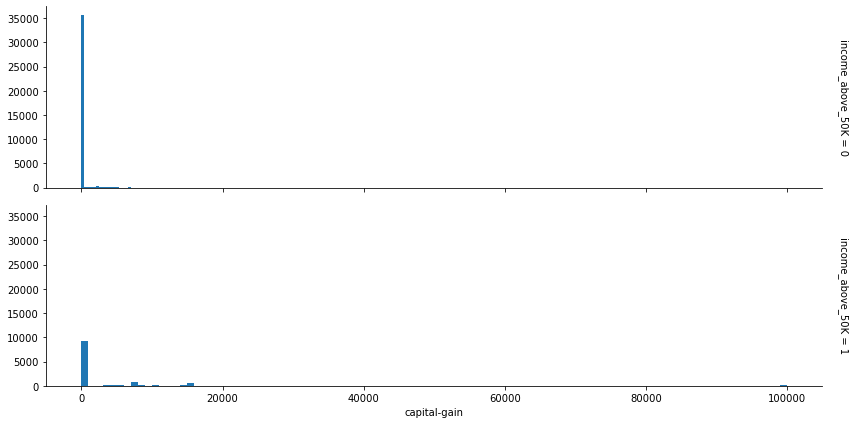

In [29]:
plotting('capital-gain')

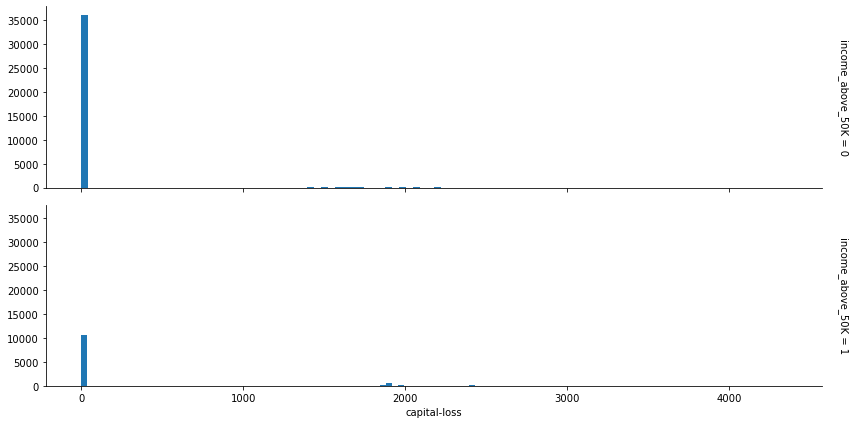

In [30]:
plotting('capital-loss')

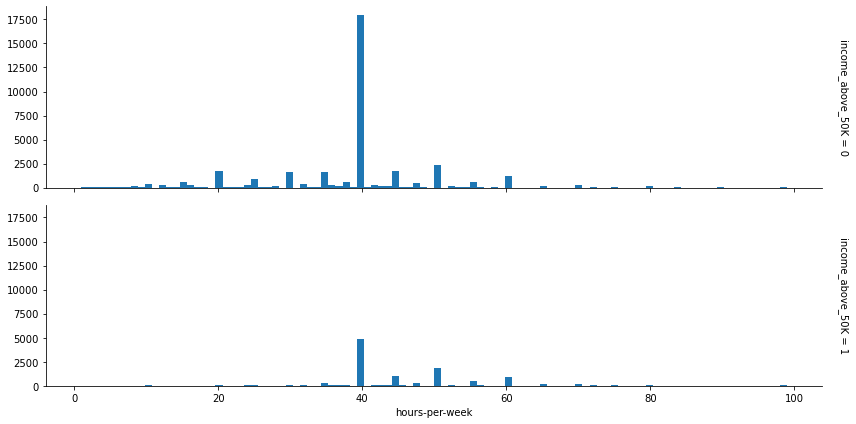

In [31]:
plotting('hours-per-week')

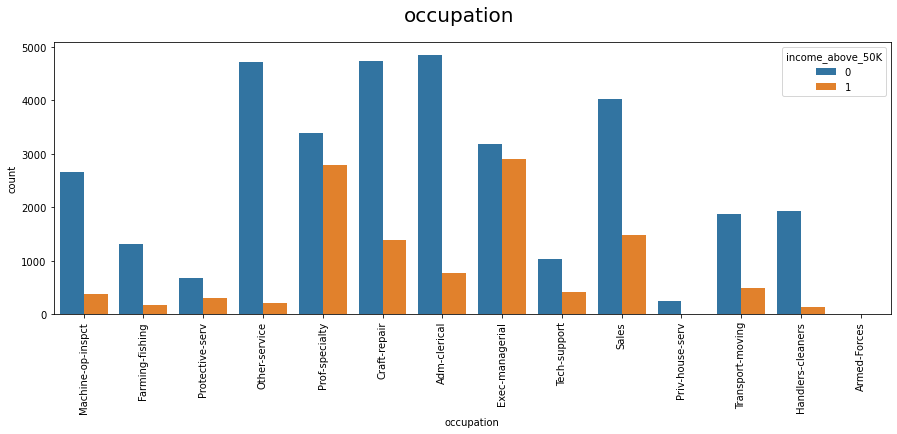

In [32]:
plotting('occupation')

In [33]:
Occu_over5ok=pd.DataFrame(income_data[income_data['income_above_50K']==1]['occupation'].value_counts())
Overallcount_by_occ=pd.DataFrame(income_data['occupation'].value_counts())
Table=pd.merge(Occu_over5ok,Overallcount_by_occ,left_index=True,right_index=True)
Table.rename(columns={'occupation_x':'income_over_50K','occupation_y':'Total number'}, inplace=True)
Table['percent_of_above_50K']=Table['income_over_50K']/(Table['Total number'])
Table=Table.sort_values(by='percent_of_above_50K',axis=0,ascending=False)
Table

,income_over_50K,Total number,percent_of_above_50K
Exec-managerial,2908,6086,0.477818
Prof-specialty,2784,6172,0.451069
Armed-Forces,5,15,0.333333
Protective-serv,308,983,0.313327
Tech-support,420,1446,0.290456
Sales,1475,5504,0.267987
Craft-repair,1383,6112,0.226276
Transport-moving,481,2355,0.204246
Adm-clerical,768,5611,0.136874
Machine-op-inspct,372,3022,0.123097


In [34]:
# We will use the Occupation Column in Data Transformation as:
#Top 30%- class_3
#Between 20-30 - class_2
#Below 20% - class-1

## Data Transformation:

In [20]:
# Transforming Sex Column
income_data['is_female']=income_data['sex'].map({'Male':0, 'Female':1})

In [21]:
# Transforming WorkClass Column
income_data['is_private']=income_data['workclass'].map({'Private':1})
income_data['is_private'].fillna(0, inplace=True)

In [22]:
# Transforming Education Column
income_data['education'] = income_data['education'].map(
        {'Preschool':'level_1','1st-4th':'level_1','5th-6th':'level_1','7th-8th':'level_1','9th':'level_1','10th':'level_1','11th':'level_1','12th':'level_1','HS-grad':'level_1',
        'Prof-school':'level_2','Assoc-acdm':'level_2','Assoc-voc':'level_2','Some-college':'level_2',
        'Bachelors':'level_3','Masters':'level_3','Doctorate':'level_3'})


In [23]:
# Transforming Marital-status Column
income_data['is_couple']=income_data['marital-status'].map({'Married-civ-spouse':1,'Never-married':0,'Divorced':0,'Separated':0,'Widowed':0,'Married-spouse-absent':0,'Married-AF-spouse':1})

In [24]:
# Transforming Occupation Column 
income_data['occupation']=income_data['occupation'].map(
    {'Exec-managerial':'class_3',
    'Prof-specialty':'class_3',
    'Armed-Forces':'class_3',
    'Protective-serv':'class_3',
    'Tech-support':'class_2',
    'Sales':'class_2',
    'Craft-repair':'class_2',
    'Transport-moving':'class_2',
    'Adm-clerical':'class_1',
    'Machine-op-inspct':'class_1',
    'Farming-fishing':'class_1',
    '?':'class_1',
    'Handlers-cleaners':'class_1',
    'Other-service':'class_1',
    'Priv-house-serv':'class_1'})

In [25]:
#Transforming race column 
income_data['is_white']=income_data['race'].map(
      {'Black':0, 'White':1, 'Asian-Pac-Islander':0, 'Other':0,'Amer-Indian-Eskimo':0})

In [26]:
#Transforming Native Country
income_data['native-country']=income_data['native-country'].map({'United-States':1})
income_data['native-country'].fillna(0, inplace=True)

In [27]:
# Create Dummies for Education
cols_education = pd.get_dummies(income_data['education'], prefix= 'education')
income_data[cols_education.columns] = cols_education
income_data.drop('education', axis = 1, inplace = True)

In [28]:
income_data['occupation'].value_counts()

class_1    17360
class_2    15417
class_3    13256
Name: occupation, dtype: int64

In [29]:
#Replacing Missing values in Occupation Column with more frequent class.
income_data['occupation'].fillna('class_1', inplace = True)
#Create Dummies for Occupation
cols_occupation = pd.get_dummies(income_data['occupation'], prefix= 'occupation')
income_data[cols_occupation.columns] = cols_occupation
income_data.drop('occupation', axis = 1, inplace = True)

In [30]:
# Dropping some coloumns
  
income_data.drop(labels=['income','sex','workclass','marital-status','relationship','race'],axis=1,inplace=True)

In [31]:
income_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,native-country,income_above_50K,is_female,is_private,is_couple,is_white,education_level_1,education_level_2,education_level_3,occupation_class_1,occupation_class_2,occupation_class_3
0,25,226802,7,0,0,40,1.0,0,0,1.0,0,0,1,0,0,1,0,0
1,38,89814,9,0,0,50,1.0,0,0,1.0,1,1,1,0,0,1,0,0
2,28,336951,12,0,0,40,1.0,1,0,0.0,1,1,0,1,0,0,0,1
3,44,160323,10,7688,0,40,1.0,1,0,1.0,1,0,0,1,0,1,0,0
4,18,103497,10,0,0,30,1.0,0,1,1.0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,38,1.0,0,1,1.0,1,1,0,1,0,0,1,0
48838,40,154374,9,0,0,40,1.0,1,0,1.0,1,1,1,0,0,1,0,0
48839,58,151910,9,0,0,40,1.0,0,1,1.0,0,1,1,0,0,1,0,0
48840,22,201490,9,0,0,20,1.0,0,0,1.0,0,1,1,0,0,1,0,0


In [32]:
income_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 48842 non-null  int64  
 1   fnlwgt              48842 non-null  int64  
 2   education-num       48842 non-null  int64  
 3   capital-gain        48842 non-null  int64  
 4   capital-loss        48842 non-null  int64  
 5   hours-per-week      48842 non-null  int64  
 6   native-country      48842 non-null  float64
 7   income_above_50K    48842 non-null  int64  
 8   is_female           48842 non-null  int64  
 9   is_private          48842 non-null  float64
 10  is_couple           48842 non-null  int64  
 11  is_white            48842 non-null  int64  
 12  education_level_1   48842 non-null  uint8  
 13  education_level_2   48842 non-null  uint8  
 14  education_level_3   48842 non-null  uint8  
 15  occupation_class_1  48842 non-null  uint8  
 16  occu

In [48]:
### There are no missing values in the columns and I can use this data for Classification Models


### Splitting the Data:

In [33]:
X = income_data.drop('income_above_50K',axis = 1)
y = income_data['income_above_50K']

In [34]:
X.shape

(48842, 17)

In [35]:
y.shape

(48842,)

In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [37]:
X_train_org, X_test_org, Y_train, Y_test = train_test_split(X, y, random_state = 0)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [38]:
X_train.shape

(36631, 17)

In [39]:
X_test.shape

(12211, 17)

In [40]:
Y_train.shape

(36631,)

In [41]:
Y_test.shape

(12211,)

# Models

In [42]:
# from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,roc_curve,precision_recall_curve

import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
def plot_ConfusionMatrix(Y_true,Y_pred):
    plt.title('Confusion Matirx')
    conf_matrix = confusion_matrix(Y_true,Y_pred)
    sns.heatmap(conf_matrix,annot=True,xticklabels=['N', 'Y'],yticklabels=['N', 'Y'],fmt='.5g')


def scores(Y_true,Y_pred):
    accuracy = accuracy_score(Y_true,Y_pred)
    print("Accuracy  :: {}".format("%.2f" %accuracy))
    
    precision = precision_score(Y_true,Y_pred)
    print("Precision :: {}".format("%.2f" %precision))
    
    recall = recall_score(Y_true,Y_pred)
    print("Recall    :: {}".format("%.2f" %recall))
    
    tn, fp, fn, tp = confusion_matrix(Y_true, Y_pred).ravel()
    specificity = tn / (tn+fp)
    print("Specificity :: {}".format("%.2f" %specificity))
    
    fscore = f1_score(Y_true,Y_pred)
    print("F1score   :: {}".format("%.2f" %fscore))

In [44]:
# Y_pred is the probability of classes and curves depicts positive class
def curves(Y_true,Y_pred):
    plt.figure(figsize=(11,5))
    plt.subplot(121)
    
    #ROC CURVE
    false_pr,true_pr,_ = roc_curve(Y_true,Y_pred[:,1])
    plt.title('ROC (Receiver Operating Characteristics) curve')
    plt.plot([0,1],[0,1],'--')
    plt.plot(false_pr,true_pr,'.-',label='Roc_curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    
    plt.subplot(122)
    
    # PR CURVE
    plt.title('Precision-Recall Curve')
    precision, recall, _ = precision_recall_curve(Y_true,Y_pred[:,1])
    plt.plot(recall,precision,'.-',label='PR CURVE')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    
    plt.tight_layout()
    plt.show()
    
    #PR v/s ROC CURVE 
    plt.title('PR v/s ROC CURVE ')
    plt.plot(false_pr,true_pr,'.-',label='Roc_curve')
    plt.plot(recall,precision,'.-',label='PR CURVE')
    plt.legend()
    plt.show()

# RBF Kernel

In [61]:
svm_rbf = SVC(probability = True)
svm_rbf.fit(X_train,Y_train)
Y_pred_svm_rbf = svm_rbf.predict(X_test)
Y_predProb_svm_rbf = svm_rbf.predict_proba(X_test)

Accuracy  :: 0.84
Precision :: 0.73
Recall    :: 0.51
Specificity :: 0.94
F1score   :: 0.60


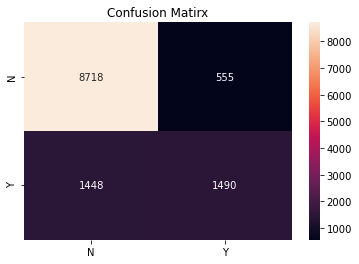

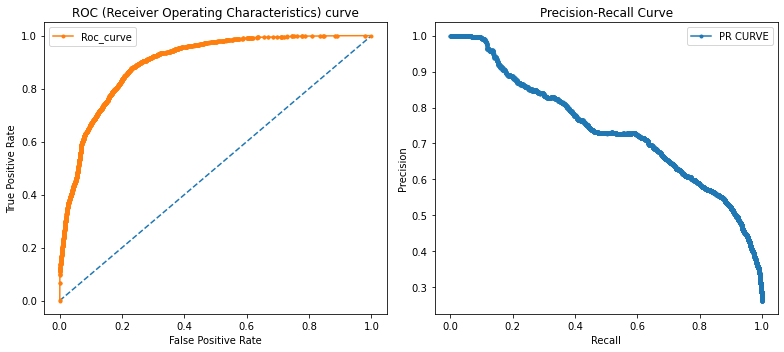

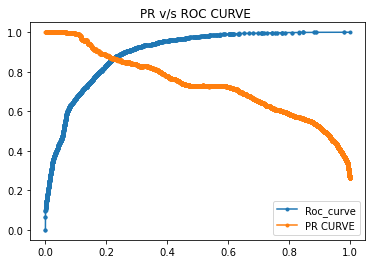

In [62]:
scores(Y_test,Y_pred_svm_rbf)
plot_ConfusionMatrix(Y_test,Y_pred_svm_rbf)
curves(Y_test,Y_predProb_svm_rbf)

# Linear svm

In [63]:
svm_lin = SVC(kernel='linear',probability=True)
svm_lin.fit(X_train,Y_train)
Y_pred_svm_lin = svm_lin.predict(X_test)
Y_predProb_svm_lin = svm_lin.predict_proba(X_test)

Accuracy  :: 0.85
Precision :: 0.74
Recall    :: 0.56
Specificity :: 0.94
F1score   :: 0.64


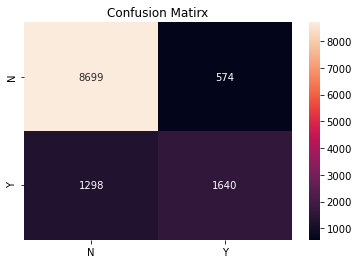

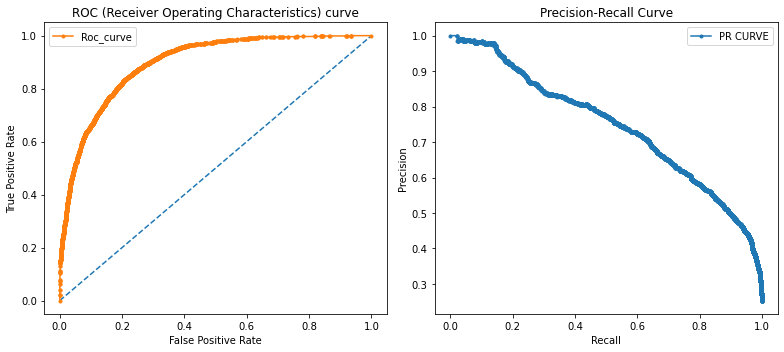

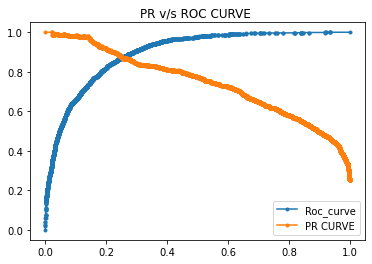

In [64]:
scores(Y_test,Y_pred_svm_lin)
plot_ConfusionMatrix(Y_test,Y_pred_svm_lin)
curves(Y_test,Y_predProb_svm_lin)

# Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      9273
           1       0.72      0.61      0.66      2938

    accuracy                           0.85     12211
   macro avg       0.80      0.77      0.78     12211
weighted avg       0.84      0.85      0.85     12211

Accuracy  :: 0.85
Precision :: 0.72
Recall    :: 0.61
Specificity :: 0.93
F1score   :: 0.66
accuracy is 0.8502170174432888


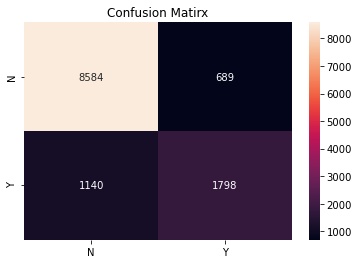

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
Ran_For_Class = RandomForestClassifier(n_estimators=30, random_state=0)
Ran_For_Class.fit(X_train,Y_train)
Ran_For_Class_pred = Ran_For_Class.predict(X_test)
print(classification_report(Y_test, Ran_For_Class_pred))
scores(Y_test,Ran_For_Class_pred)
plot_ConfusionMatrix(Y_test,Ran_For_Class_pred)
print('accuracy is',accuracy_score(Ran_For_Class_pred,Y_test))

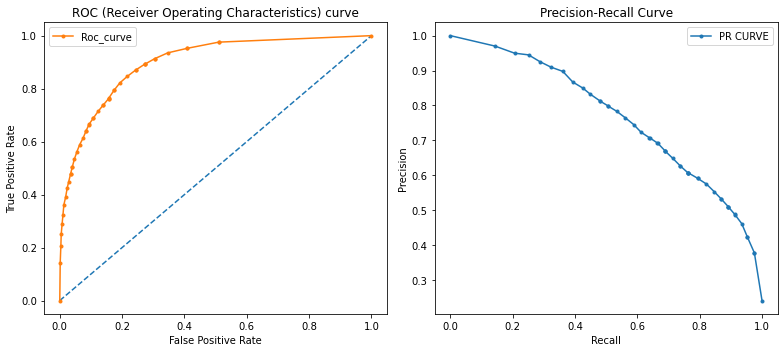

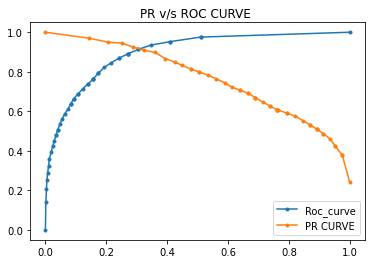

In [66]:
Ran_For_Class_predProb = Ran_For_Class.predict_proba(X_test)
curves(Y_test,Ran_For_Class_predProb)

# Logistic regression model

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9273
           1       0.73      0.58      0.64      2938

    accuracy                           0.85     12211
   macro avg       0.80      0.76      0.77     12211
weighted avg       0.84      0.85      0.84     12211

Accuracy  :: 0.85
Precision :: 0.73
Recall    :: 0.58
Specificity :: 0.93
F1score   :: 0.64
accuracy is 0.8464499222012939


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


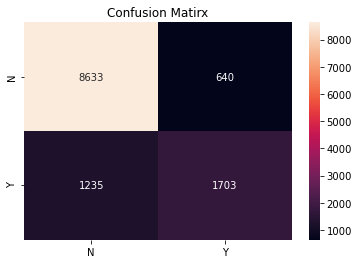

In [67]:
#Import Gaussian Naive Bayes model
from sklearn.linear_model import LogisticRegression
#Create a Gaussian Classifier
Logreg_model = LogisticRegression()
# Train the model using the training sets
Logreg_model.fit(X_train,Y_train)
#Predict Output
Logreg_model_pred = Logreg_model.predict(X_test) # 0:Overcast, 2:Mild
print(classification_report(Y_test, Logreg_model_pred))
scores(Y_test,Logreg_model_pred)
plot_ConfusionMatrix(Y_test,Logreg_model_pred)
print('accuracy is',accuracy_score(Logreg_model_pred,Y_test))

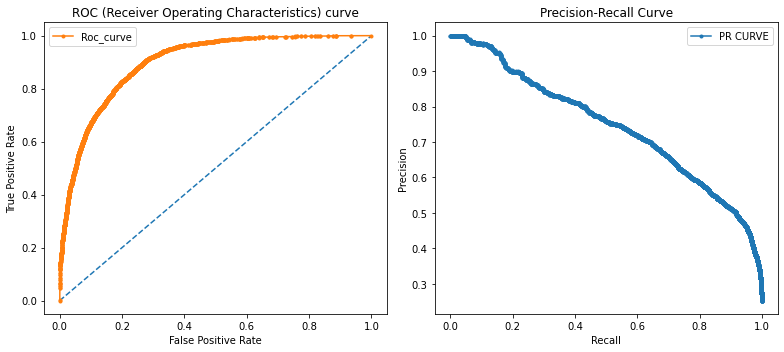

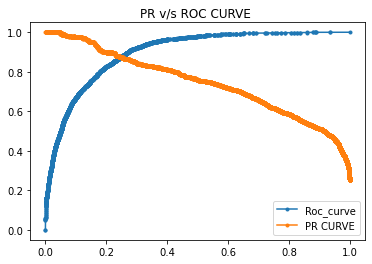

In [68]:
Logreg_model_predProb = Logreg_model.predict_proba(X_test)
curves(Y_test,Logreg_model_predProb)

# KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      9273
           1       0.64      0.57      0.60      2938

    accuracy                           0.82     12211
   macro avg       0.76      0.73      0.74     12211
weighted avg       0.81      0.82      0.82     12211

Accuracy  :: 0.82
Precision :: 0.64
Recall    :: 0.57
Specificity :: 0.90
F1score   :: 0.60
accuracy is 0.8198345753828515


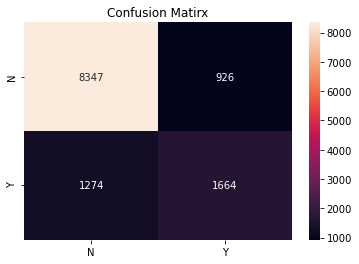

In [69]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, Y_train)

KNN_model_pred = KNN_model.predict(X_test)
print(classification_report(Y_test, KNN_model_pred))
scores(Y_test,KNN_model_pred)
plot_ConfusionMatrix(Y_test,KNN_model_pred)
print('accuracy is',accuracy_score(KNN_model_pred,Y_test))

# Apply two voting classifiers - one with hard voting and one with soft voting

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      9273
           1       0.75      0.57      0.65      2938

    accuracy                           0.85     12211
   macro avg       0.81      0.76      0.78     12211
weighted avg       0.84      0.85      0.84     12211

Accuracy  :: 0.85
Precision :: 0.75
Recall    :: 0.57
Specificity :: 0.94
F1score   :: 0.65
accuracy is 0.8516910981901564


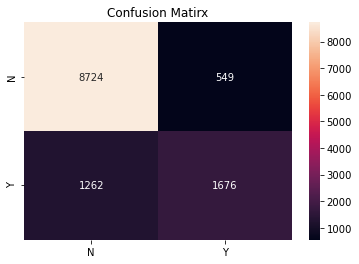

In [70]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=[('svm_rbf',svm_rbf), ('svm_lin',svm_lin), ('Ran_For_Class',Ran_For_Class), 
                                  ('KNN_model',KNN_model)], voting='soft')
vc.fit(X_train, Y_train)

vc_pred = vc.predict(X_test)
print(classification_report(Y_test, vc_pred))
scores(Y_test,vc_pred)
plot_ConfusionMatrix(Y_test,vc_pred)
print('accuracy is',accuracy_score(vc_pred,Y_test))
vc_predProb = vc.predict_proba(X_test)

In [112]:
vc_hard_predProb = vc.predict_proba(X_test)

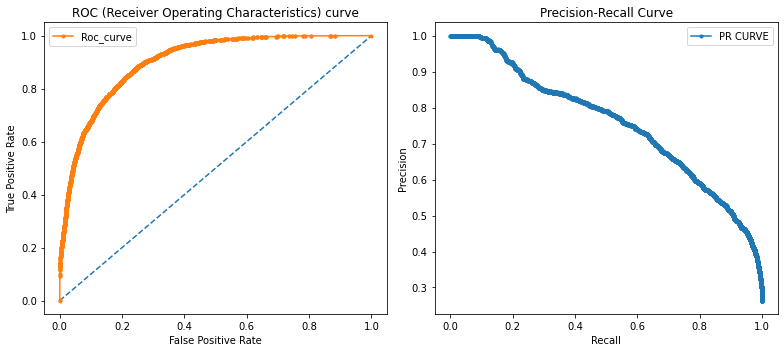

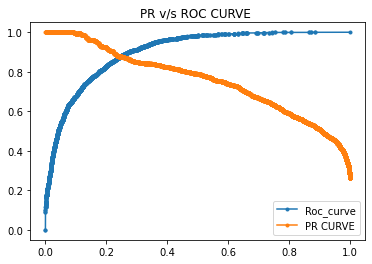

In [113]:
curves(Y_test,vc_hard_predProb)

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      9273
           1       0.79      0.49      0.60      2938

    accuracy                           0.85     12211
   macro avg       0.82      0.72      0.75     12211
weighted avg       0.84      0.85      0.83     12211

Accuracy  :: 0.85
Precision :: 0.79
Recall    :: 0.49
Specificity :: 0.96
F1score   :: 0.60
accuracy is 0.8451396282040783


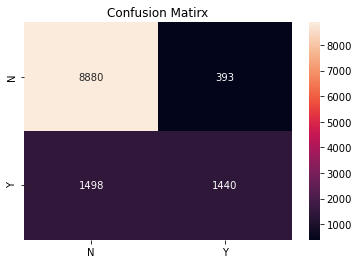

In [71]:
from sklearn.ensemble import VotingClassifier
vc_hard = VotingClassifier(estimators=[('svm_rbf',svm_rbf), ('svm_lin',svm_lin), ('Ran_For_Class',Ran_For_Class), 
                                  ('KNN_model',KNN_model)], voting='hard')
vc_hard.fit(X_train, Y_train)

vc_hard_pred = vc_hard.predict(X_test)
print(classification_report(Y_test, vc_hard_pred))
scores(Y_test,vc_hard_pred)
plot_ConfusionMatrix(Y_test,vc_hard_pred)
print('accuracy is',accuracy_score(vc_hard_pred,Y_test))
#vc_hard_predProb = vc_hard.predict_proba(X_test)

predict_proba is not available when voting='hard' so, ROC curve cannot be plot

# Apply any two models with AdaBoost boosting

# Decision tree with AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
ada_clf_Dec = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf_Dec.fit(X_train, Y_train)
y_pred_Dec = ada_clf_Dec.predict(X_test)


Train score by AdaBoost with decision tree: 0.86
Test score by AdaBoost with decision tree: 0.86
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      9273
           1       0.78      0.61      0.68      2938

    accuracy                           0.86     12211
   macro avg       0.83      0.78      0.80     12211
weighted avg       0.86      0.86      0.86     12211

Accuracy  :: 0.86
Precision :: 0.78
Recall    :: 0.61
Specificity :: 0.95
F1score   :: 0.68
accuracy is 0.8647121447874867


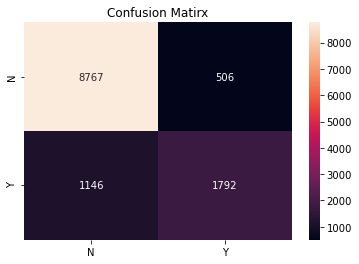

In [73]:
print('Train score by AdaBoost with decision tree: %.2f'%ada_clf_Dec.score(X_train, Y_train))
print('Test score by AdaBoost with decision tree: %.2f'%ada_clf_Dec.score(X_test, Y_test))

print(classification_report(Y_test, y_pred_Dec))
scores(Y_test,y_pred_Dec)
plot_ConfusionMatrix(Y_test,y_pred_Dec)
print('accuracy is',accuracy_score(y_pred_Dec,Y_test))
ada_clf_DecProb = ada_clf_Dec.predict_proba(X_test)

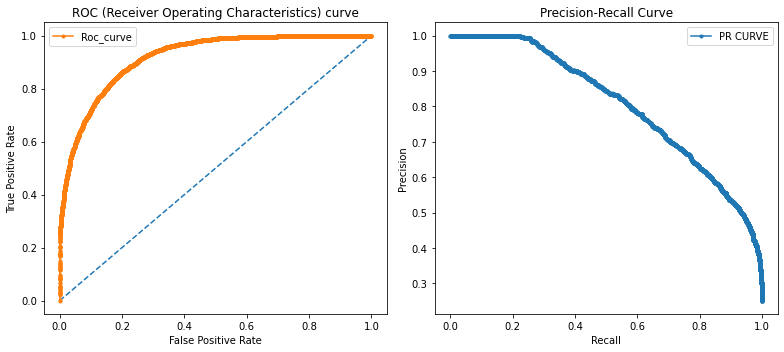

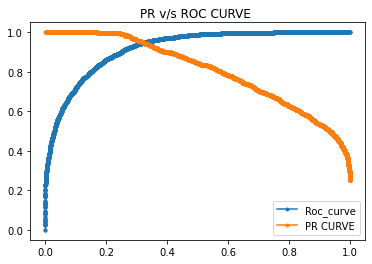

In [74]:
curves(Y_test,ada_clf_DecProb)

# Random Forest Classifier with AdaBoost

In [80]:
abc_KNN =AdaBoostClassifier(RandomForestClassifier(max_depth=1), n_estimators=200, 
                             algorithm="SAMME.R", learning_rate=0.5, random_state=0)
abc_KNN.fit(X_train, Y_train)
y_pred_KNN = abc_KNN.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      9273
           1       0.77      0.61      0.68      2938

    accuracy                           0.86     12211
   macro avg       0.82      0.77      0.79     12211
weighted avg       0.85      0.86      0.85     12211

Accuracy  :: 0.86
Precision :: 0.77
Recall    :: 0.61
Specificity :: 0.94
F1score   :: 0.68
accuracy is 0.8605355826713619


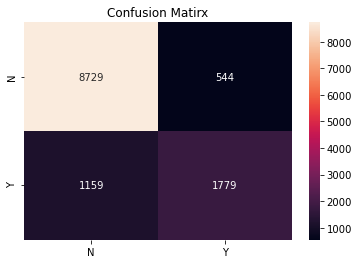

In [81]:
print(classification_report(Y_test, y_pred_KNN))
scores(Y_test,y_pred_KNN)
plot_ConfusionMatrix(Y_test,y_pred_KNN)
print('accuracy is',accuracy_score(y_pred_KNN,Y_test))
abc_KNNProb = abc_KNN.predict_proba(X_test)

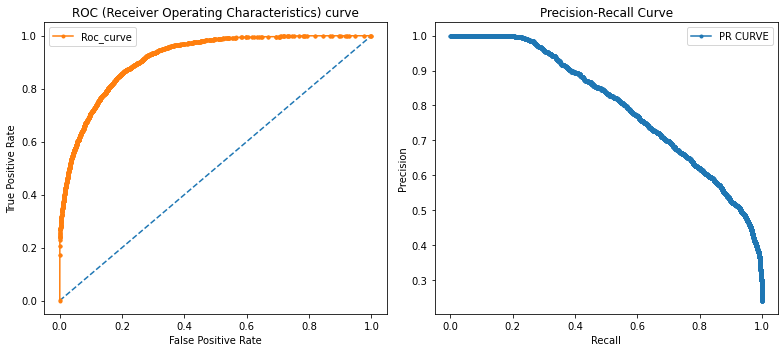

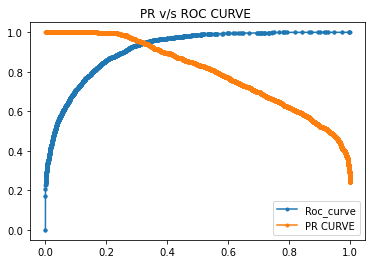

In [82]:
curves(Y_test,abc_KNNProb)

# Apply any two models with bagging and any two models with pasting

# Decision tree with bagging

In [83]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# bagging: bootstrap = True
# pasting: bootstrap = False

dt_clf = DecisionTreeClassifier(random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score = True)

bag_clf.fit(X_train, Y_train)
bag_y_pred = bag_clf.predict(X_test)

Train score: 0.85
Test score: 0.85
Out-of-bag score: 0.85
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      9273
           1       0.77      0.54      0.64      2938

    accuracy                           0.85     12211
   macro avg       0.82      0.75      0.77     12211
weighted avg       0.84      0.85      0.84     12211

Accuracy  :: 0.85
Precision :: 0.77
Recall    :: 0.54
Specificity :: 0.95
F1score   :: 0.64
accuracy is 0.8507083776922447


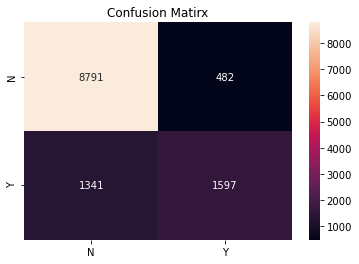

In [84]:
from  sklearn.metrics import accuracy_score

print('Train score: %.2f'%bag_clf.score(X_train, Y_train))
print('Test score: %.2f'%bag_clf.score(X_test, Y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)

print(classification_report(Y_test, bag_y_pred))
scores(Y_test,bag_y_pred)
plot_ConfusionMatrix(Y_test,bag_y_pred)
print('accuracy is',accuracy_score(bag_y_pred,Y_test))
bag_DTProb = bag_clf.predict_proba(X_test)

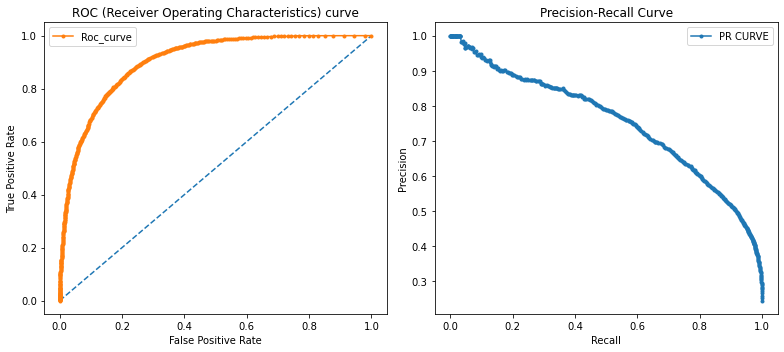

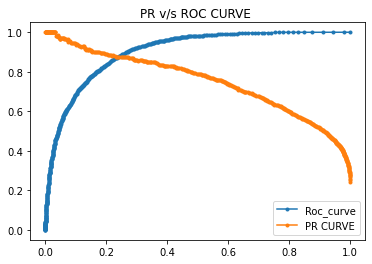

In [85]:
curves(Y_test,bag_DTProb)

# KNN with bagging

In [86]:
from sklearn.neighbors import KNeighborsClassifier
# bagging: bootstrap = True
# pasting: bootstrap = False

KNN_clf = KNeighborsClassifier(n_neighbors=3)
bag_KNN = BaggingClassifier(KNN_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score = True)

bag_KNN.fit(X_train, Y_train)
bag_KNN_pred = bag_clf.predict(X_test)

Train score: 0.85
Test score: 0.85
Out-of-bag score: 0.85
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      9273
           1       0.77      0.54      0.64      2938

    accuracy                           0.85     12211
   macro avg       0.82      0.75      0.77     12211
weighted avg       0.84      0.85      0.84     12211

Accuracy  :: 0.85
Precision :: 0.77
Recall    :: 0.54
Specificity :: 0.95
F1score   :: 0.64
accuracy is 0.8507083776922447


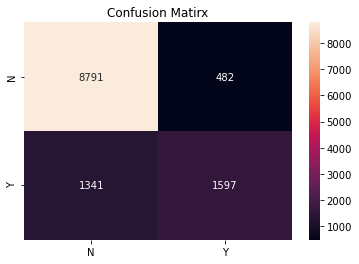

In [87]:
from  sklearn.metrics import accuracy_score

print('Train score: %.2f'%bag_clf.score(X_train, Y_train))
print('Test score: %.2f'%bag_clf.score(X_test, Y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)

print(classification_report(Y_test, bag_KNN_pred))
scores(Y_test,bag_KNN_pred)
plot_ConfusionMatrix(Y_test,bag_KNN_pred)
print('accuracy is',accuracy_score(bag_KNN_pred,Y_test))
bag_KNN_Prob = bag_KNN.predict_proba(X_test)

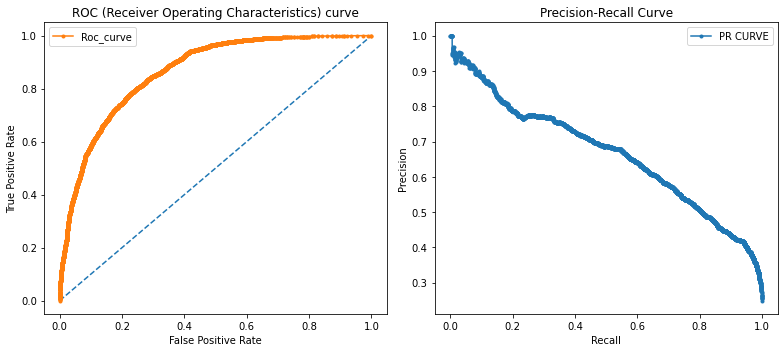

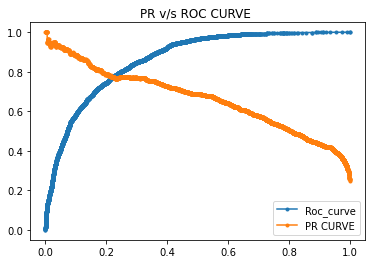

In [88]:
curves(Y_test,bag_KNN_Prob)

# Pasting classifier

# Pasting with KNN

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      9273
           1       0.70      0.45      0.55      2938

    accuracy                           0.82     12211
   macro avg       0.77      0.70      0.72     12211
weighted avg       0.81      0.82      0.81     12211

Accuracy  :: 0.82
Precision :: 0.70
Recall    :: 0.45
Specificity :: 0.94
F1score   :: 0.55
accuracy is 0.8222913766276309


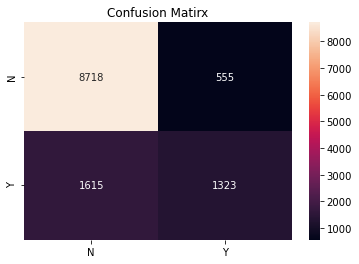

In [89]:
from sklearn.ensemble import BaggingClassifier
# bagging: bootstrap = True
# pasting: bootstrap = False

KNN_clf_pas = KNeighborsClassifier(n_neighbors=3)
bag_KNN_pas = BaggingClassifier(
    KNN_clf_pas, n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1
)

#BaggingClassifier(dt_clf_pas, n_estimators=500, max_samples=100, bootstrap=False, random_state=0, oob_score = True)

bag_KNN_pas.fit(X_train, Y_train)
bag_KNN_y_pred = bag_KNN_pas.predict(X_test)
print(classification_report(Y_test, bag_KNN_y_pred))
scores(Y_test,bag_KNN_y_pred)
plot_ConfusionMatrix(Y_test,bag_KNN_y_pred)
print('accuracy is',accuracy_score(bag_KNN_y_pred,Y_test))
bag_KNN_Prob = bag_KNN_pas.predict_proba(X_test)

In [90]:
from  sklearn.metrics import accuracy_score

print('Train score by pasting: %.2f'%bag_KNN_pas.score(X_train, Y_train))
print('Test score by pasting: %.2f'%bag_KNN_pas.score(X_test, Y_test))

Train score by pasting: 0.83
Test score by pasting: 0.82


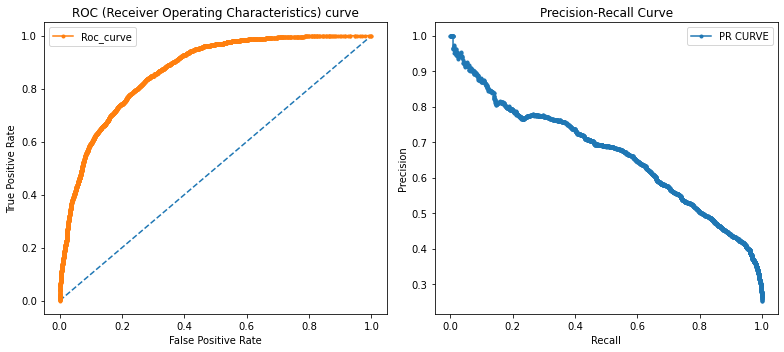

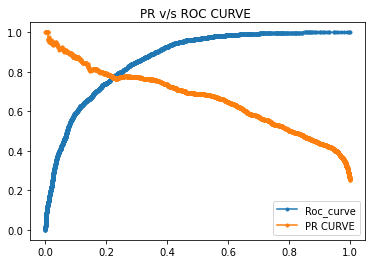

In [91]:
curves(Y_test,bag_KNN_Prob)

# Pasting with Decision tree

In [92]:
from sklearn.ensemble import BaggingClassifier
# bagging: bootstrap = True
# pasting: bootstrap = False


bag_DT_pas = BaggingClassifier(
    DecisionTreeClassifier(max_leaf_nodes=20), n_estimators=500,
    max_samples=100, bootstrap=False, n_jobs=-1
)

#BaggingClassifier(dt_clf_pas, n_estimators=500, max_samples=100, bootstrap=False, random_state=0, oob_score = True)

bag_DT_pas.fit(X_train, Y_train)
bag_DT_y_pred = bag_DT_pas.predict(X_test)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      9273
           1       0.76      0.56      0.64      2938

    accuracy                           0.85     12211
   macro avg       0.82      0.75      0.77     12211
weighted avg       0.84      0.85      0.84     12211

Accuracy  :: 0.85
Precision :: 0.76
Recall    :: 0.56
Specificity :: 0.95
F1score   :: 0.64
accuracy is 0.8516092048153304


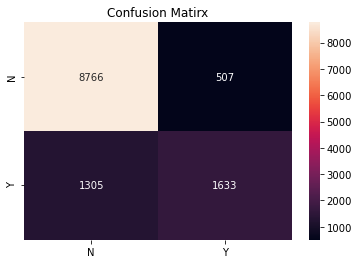

In [93]:
print(classification_report(Y_test, bag_DT_y_pred))
scores(Y_test,bag_DT_y_pred)
plot_ConfusionMatrix(Y_test,bag_DT_y_pred)
print('accuracy is',accuracy_score(bag_DT_y_pred,Y_test))

# Apply one model with gradient boosting

In [94]:
# by default, decision tree is combined with this model
from sklearn.ensemble import GradientBoostingClassifier
GBC_clf_Dec = GradientBoostingClassifier(n_estimators=200, 
                             learning_rate=0.5, random_state=0)
GBC_clf_Dec.fit(X_train, Y_train)
GBC_y_pred_Dec = GBC_clf_Dec.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.94      0.92      9273
           1       0.78      0.64      0.71      2938

    accuracy                           0.87     12211
   macro avg       0.84      0.79      0.81     12211
weighted avg       0.87      0.87      0.87     12211

Accuracy  :: 0.87
Precision :: 0.78
Recall    :: 0.64
Specificity :: 0.94
F1score   :: 0.71
accuracy is 0.8708541478994349


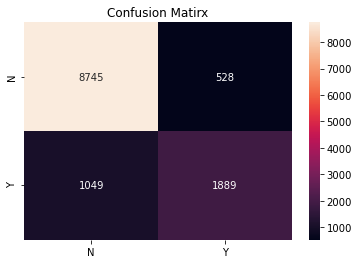

In [95]:
print(classification_report(Y_test, GBC_y_pred_Dec))
scores(Y_test,GBC_y_pred_Dec)
plot_ConfusionMatrix(Y_test,GBC_y_pred_Dec)
print('accuracy is',accuracy_score(GBC_y_pred_Dec,Y_test))

# PCA

Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare a similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?

In [96]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train_PCA = pca.fit_transform(X_train)
X_test_PCA = pca.transform(X_test)

In [97]:
X_train_PCA.shape

(36631, 10)

# Logistic regression With PCA

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      9273
           1       0.69      0.52      0.59      2938

    accuracy                           0.83     12211
   macro avg       0.77      0.72      0.74     12211
weighted avg       0.82      0.83      0.82     12211

Accuracy  :: 0.83
Precision :: 0.69
Recall    :: 0.52
Specificity :: 0.92
F1score   :: 0.59
accuracy is 0.8271230857423635


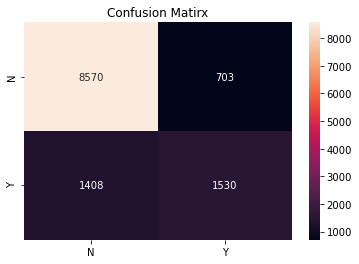

In [98]:
#Import Gaussian Naive Bayes model
from sklearn.linear_model import LogisticRegression
#Create a Gaussian Classifier
Logreg_model_PCA = LogisticRegression()
# Train the model using the training sets
Logreg_model_PCA.fit(X_train_PCA,Y_train)
#Predict Output
Logreg_model_pred_PCA = Logreg_model_PCA.predict(X_test_PCA)
print(classification_report(Y_test, Logreg_model_pred_PCA))
scores(Y_test,Logreg_model_pred_PCA)
plot_ConfusionMatrix(Y_test,Logreg_model_pred_PCA)
print('accuracy is',accuracy_score(Logreg_model_pred_PCA,Y_test))

# PCA with KNN

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      9273
           1       0.61      0.54      0.57      2938

    accuracy                           0.81     12211
   macro avg       0.73      0.72      0.72     12211
weighted avg       0.80      0.81      0.80     12211

Accuracy  :: 0.81
Precision :: 0.61
Recall    :: 0.54
Specificity :: 0.89
F1score   :: 0.57
accuracy of KNN with PCA 0.8198345753828515


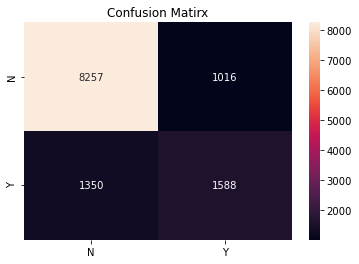

In [99]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_PCA, Y_train)

KNN_model_pred_PCA = KNN_model.predict(X_test_PCA)
print(classification_report(Y_test, KNN_model_pred_PCA))
scores(Y_test,KNN_model_pred_PCA)
plot_ConfusionMatrix(Y_test,KNN_model_pred_PCA)
print('accuracy of KNN with PCA',accuracy_score(KNN_model_pred,Y_test))

# PCA with Random Forest Classifier¶

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      9273
           1       0.62      0.54      0.58      2938

    accuracy                           0.81     12211
   macro avg       0.74      0.72      0.73     12211
weighted avg       0.80      0.81      0.81     12211

Accuracy  :: 0.81
Precision :: 0.62
Recall    :: 0.54
Specificity :: 0.90
F1score   :: 0.58
accuracy is 0.8107444107771681


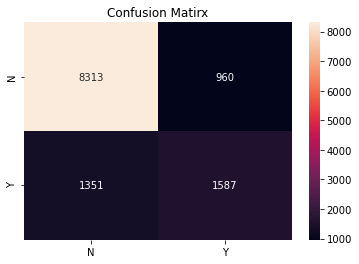

In [100]:
Ran_For_Class.fit(X_train_PCA, Y_train)
Ran_For_Class_pred_PCA = Ran_For_Class.predict(X_test_PCA)
print(classification_report(Y_test, Ran_For_Class_pred_PCA))
scores(Y_test,Ran_For_Class_pred_PCA)
plot_ConfusionMatrix(Y_test,Ran_For_Class_pred_PCA)
print('accuracy is',accuracy_score(Ran_For_Class_pred_PCA,Y_test))

# PCA with SVM linear 

Accuracy  :: 0.81
Precision :: 0.60
Recall    :: 0.63
Specificity :: 0.86
F1score   :: 0.61


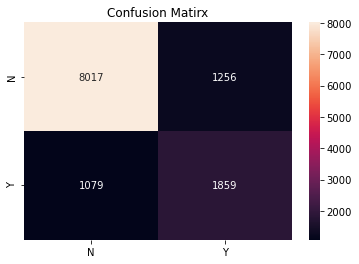

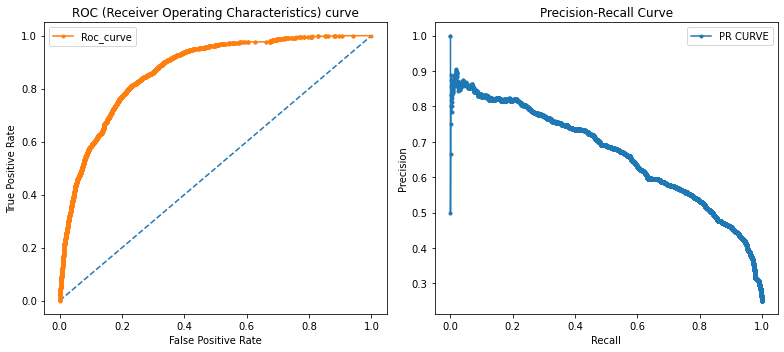

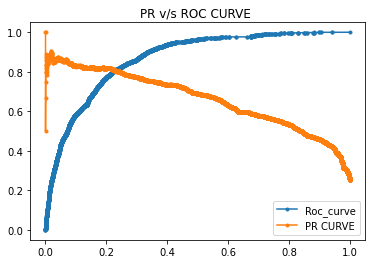

In [101]:
svm_lin_PCA = SVC(kernel='linear',probability=True)
svm_lin_PCA.fit(X_train_PCA,Y_train)
Y_pred_svm_lin_PCA = svm_lin_PCA.predict(X_test_PCA)
Y_predProb_svm_lin_PCA = svm_lin_PCA.predict_proba(X_test_PCA)
scores(Y_test,Y_pred_svm_lin_PCA)
plot_ConfusionMatrix(Y_test,Y_pred_svm_lin_PCA)
curves(Y_test,Y_predProb_svm_lin_PCA)

# Comparision the performance of model with PCA and Without PCA

# Logistic Regression with and wihtout PCA

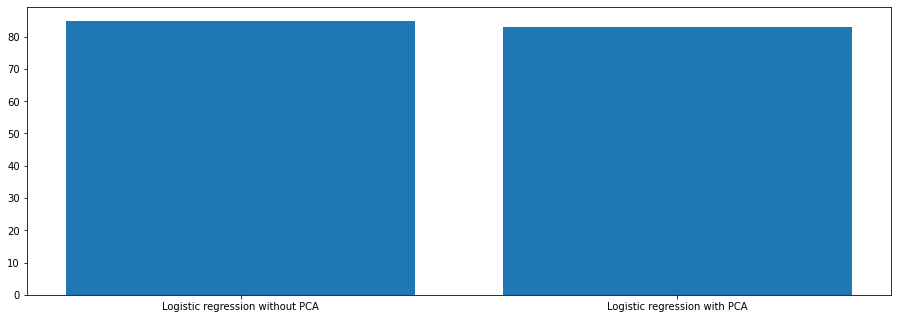

In [102]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
langs_lin = ['Logistic regression without PCA','Logistic regression with PCA']
students_lin = [85,83]
ax.bar(langs_lin,students_lin)
plt.show()

# Linear SVM, with and wihtout PCA

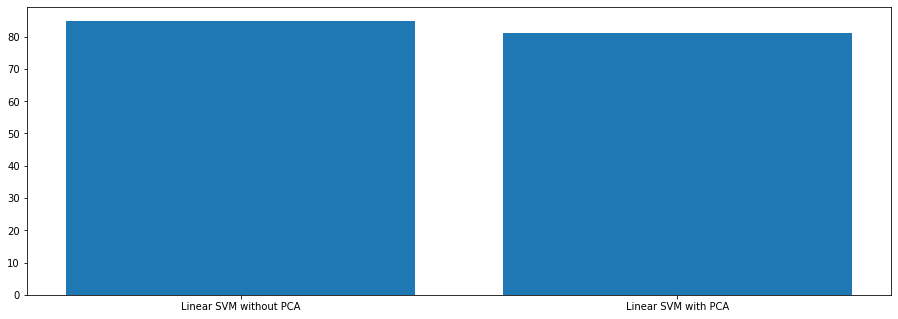

In [103]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
langs_lin = ['Linear SVM without PCA','Linear SVM with PCA']
students_lin = [85,81]
ax.bar(langs_lin,students_lin)
plt.show()

# Random Forest Classifier, with and wihtout PCA

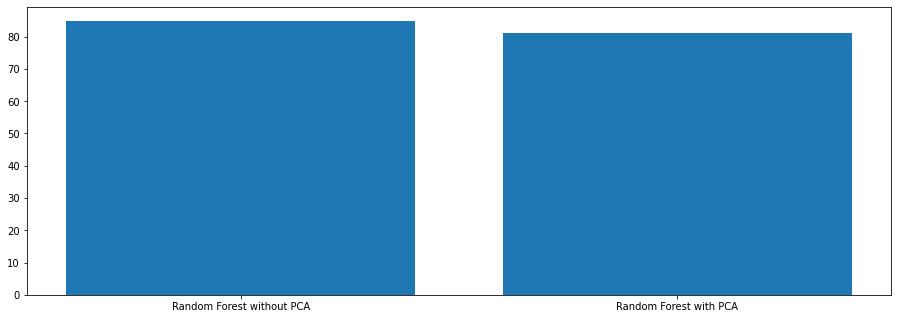

In [104]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
langs_RF = ['Random Forest without PCA','Random Forest with PCA']
students_RF = [85,81]
ax.bar(langs_RF,students_RF)
plt.show()

# KNeighborsClassifier, with and wihtout PCA

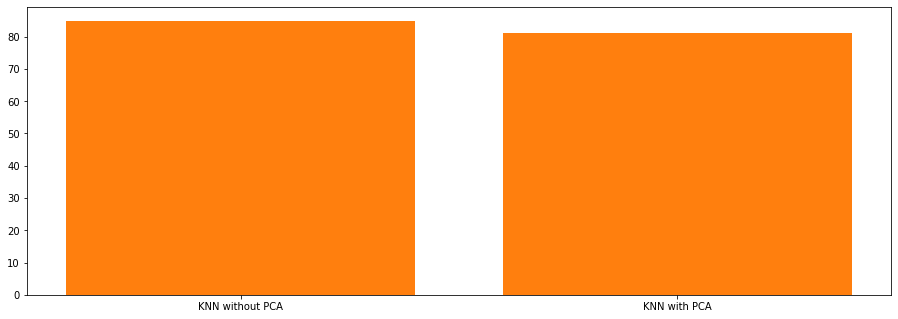

In [106]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
langs_KNN = ['KNN without PCA','KNN with PCA']
students_KNN = [85,81]
ax.bar(langs_KNN,students_KNN)
ax.bar(langs_KNN,students_KNN)
plt.show()

In the conclusion: the performance all models, wihout PCA, the model has better peformance as comparision to with PCA. 


# Apply deep learning models covered in class

In [60]:
import tensorflow as tf
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=4096, activation='relu'))
ann.add(tf.keras.layers.Dense(units=4096, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='softmax'))

In [61]:
ann.compile(optimizer = tf.keras.optimizers.Adam (learning_rate=0.0001), loss = 'mse', metrics = ['accuracy'])

In [62]:
ann.fit(X_train, Y_train, batch_size = 32, epochs = 20)

Epoch 1/20
1145/1145 [==============================] - 122s 107ms/step - loss: 0.7612 - accuracy: 0.2388
Epoch 2/20
1145/1145 [==============================] - 126s 110ms/step - loss: 0.7612 - accuracy: 0.2388
Epoch 3/20
1145/1145 [==============================] - 125s 109ms/step - loss: 0.7612 - accuracy: 0.2388
Epoch 4/20
1145/1145 [==============================] - 124s 108ms/step - loss: 0.7612 - accuracy: 0.2388
Epoch 5/20
1145/1145 [==============================] - 122s 106ms/step - loss: 0.7612 - accuracy: 0.2388
Epoch 6/20
1145/1145 [==============================] - 121s 106ms/step - loss: 0.7612 - accuracy: 0.2388
Epoch 7/20
1145/1145 [==============================] - 134s 117ms/step - loss: 0.7612 - accuracy: 0.2388
Epoch 8/20
1145/1145 [==============================] - 153s 134ms/step - loss: 0.7612 - accuracy: 0.2388
Epoch 9/20
1145/1145 [==============================] - 123s 107ms/step - loss: 0.7612 - accuracy: 0.2388
Epoch 10/20
1145/1145 [=======================

In [63]:
score_Alexnet = ann.evaluate(X_test, Y_test)

382/382 [==============================] - 3s 9ms/step - loss: 0.7594 - accuracy: 0.2406
